# Data Analysis for Both Walker Agents and Puncher Agents

#### Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.style.use('seaborn-bright')

#### Helper Functions

In [98]:
def get_reward_data(training_run, model, col1, col2, timing_data=False):
    df = pd.read_csv(f"training_results/{training_run}/{model}.csv")
    df = df.dropna(axis=0)
    if timing_data:
        td = get_timing_data(training_run, header=None)
        for i in range(len(td)):
            td[i] = float(td[i])
        return td, df[col2]
    else:
        return df[col1], df[col2]
    
def get_timing_data(training_run, header=None):
    s = pd.read_csv(f"training_results/{training_run}/timings.csv", header=header, index_col=None)
    for i in range(s.shape[0]):
        s.iloc[i] = s.iloc[i].str.split('Time Elapsed: ')[0][1].split(' s')[0]
    return s[0]

def single_plot(x, y, xlabel, ylabel, color, model):
    fig, axs = plt.subplots(figsize=(12,10))
    axs.plot(df1_x, df1_y, color=color)
    axs.grid(False)
    #axs.legend(fontsize=20)
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.set_title(f"{ylabel} vs {xlabel} for {model}")
    plt.show()
    
def plot_multiple(training_runs, labels, model, col1, col2, figsize=(12,10), savefig=False, save_name='images/Testplot'):
    """Plots multiple plots in one figure. Has the option to save the figure if savefig is True
    
       parameters:
         training_runs - (list) training run names (strings) which are the names of the 
           folders in the training_results folder
         labels        - (list) label names for plots
         model         - (string) either Walker or Puncher
         col1          - (string) the name of the column for the x axis data
         col2          - (string) the name of the column for the y axis data
         figsize       - (tuple) the size of the plot
         savefig       - (bool) the figure will be saved if savefig is set to True
         save_name     - (string) the path and name of the figure to be saved
         
       returns:
         none, will plot the figure and save it if requested."""
    fig, axs = plt.subplots(figsize=figsize)
    for i in range(len(training_runs)):
        df_x, df_y = get_reward_data(training_runs[i], model, col1, col2)
        axs.plot(df_x, df_y, label=labels[i])
    axs.grid(False)
    axs.legend(fontsize=20)
    axs.set_xlabel(col1)
    # clean up the names a little
    if col2 == 'Policy/Extrinsic Reward':
        col2 = 'Policy Reward'
    elif col2 == 'Policy/Entropy':
        col2 = 'Policy Entropy'
    axs.set_ylabel(col2)
    axs.set_title(f"{col2} vs {col1} for {model}")
    if savefig:
        plt.savefig(f'{save_name}.png')
    plt.show()
    
def plot_multiple_timing(training_runs, labels, model, col1, col2, figsize=(12,10), savefig=False, save_name='images/Testplot', timing_data=True):
    """Plots multiple plots in one figure where training time is the x axis. 
       Has the option to save the figure if savefig is True
    
       parameters:
         training_runs - (list) training run names (strings) which are the names of the 
           folders in the training_results folder
         labels        - (list) label names for plots
         model         - (string) either Walker or Puncher
         col1          - (string) the name of the column for the x axis data
         col2          - (string) the name of the column for the y axis data
         figsize       - (tuple) the size of the plot
         savefig       - (bool) the figure will be saved if savefig is set to True
         save_name     - (string) the path and name of the figure to be saved
         
       returns:
         none, will plot the figure and save it if requested."""
    fig, axs = plt.subplots(figsize=figsize)
    for i in range(len(training_runs)):
        df_x, df_y = get_reward_data(training_runs[i], model, col1, col2, timing_data=True)
        axs.plot(df_x, df_y, label=labels[i])
    axs.grid(False)
    axs.legend(fontsize=20)
    axs.set_xlabel('Total Training Time (s)')
    # clean up the names a little
    if col2 == 'Policy/Extrinsic Reward':
        col2 = 'Policy Reward'
    elif col2 == 'Policy/Entropy':
        col2 = 'Policy Entropy'
    axs.set_ylabel(col2)
    axs.set_title(f"{col2} vs Total Training Time for {model}")
    if savefig:
        plt.savefig(f'{save_name}.png')
    plt.show()

## Training Data for Walkers

How does the data look for these training runs?

In [8]:
df = pd.read_csv('Training Results/walker_T1/Walker.csv')
df.head()

,Steps,Policy/Entropy,Environment/Episode Length,Policy/Extrinsic Value Estimate,Environment/Cumulative Reward,Policy/Extrinsic Reward,Is Training
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3000.0,1.418939,22.653543,-0.019846,-5.164475,-5.164475,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6000.0,1.418939,25.000000,-0.018458,-5.830675,-5.830675,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data needs to be cleaned a little so there are no rows with `NaN`

In [9]:
df = pd.read_csv('Training Results/walker_T1/Walker.csv')
df = df.dropna(axis=0)
df.head()

,Steps,Policy/Entropy,Environment/Episode Length,Policy/Extrinsic Value Estimate,Environment/Cumulative Reward,Policy/Extrinsic Reward,Is Training
1,3000.0,1.418939,22.653543,-0.019846,-5.164475,-5.164475,1.0
3,6000.0,1.418939,25.000000,-0.018458,-5.830675,-5.830675,1.0
5,9000.0,1.418939,22.728000,-0.021135,-5.356892,-5.356892,1.0
7,12000.0,1.418939,23.826446,-0.028654,-5.613264,-5.613264,1.0
9,15000.0,1.418938,22.857143,-0.028026,-5.959240,-5.959240,1.0


Columns for data plots will be defined and passed into the `get_reward_data()` function.

In [6]:
# col1 = 'Steps'
# col2 = 'Policy/Entropy'
# df1_x, df1_y = get_reward_data('Training Results/walker_T1/Walker.csv', col1, col2)
# df4_x, df4_y = get_reward_data('Training Results/walker_T4/Walker.csv', col1, col2)
# df5_x, df5_y = get_reward_data('Training Results/walker_T5/Walker.csv', col1, col2)
# df6_x, df6_y = get_reward_data('Training Results/walker_T6/Walker.csv', col1, col2)
# df7_x, df7_y = get_reward_data('Training Results/walker_T7/Walker.csv', col1, col2)
# df8_x, df8_y = get_reward_data('Training Results/walker_T8/Walker.csv', col1, col2)
# df9_x, df9_y = get_reward_data('Training Results/walker_T9/Walker.csv', col1, col2)
# df10_x, df10_y = get_reward_data('Training Results/walker_T10/Walker.csv', col1, col2)
# df11_x, df11_y = get_reward_data('Training Results/walker_T11/Walker.csv', col1, col2)
# df12_x, df12_y = get_reward_data('Training Results/walker_T12/Walker.csv', col1, col2)
# df13_x, df13_y = get_reward_data('Training Results/walker_T13/Walker.csv', col1, col2)
# df14_x, df14_y = get_reward_data('Training Results/walker_T14/Walker.csv', col1, col2)
# df15_x, df15_y = get_reward_data('Training Results/walker_T15/Walker.csv', col1, col2)
# df16_x, df16_y = get_reward_data('Training Results/walker_SAC1/Walker.csv', col1, col2)
# df17_x, df17_y = get_reward_data('Training Results/walker_3bois/Walker.csv', col1, col2)
# df18_x, df18_y = get_reward_data('Training Results/walker_6bois/Walker.csv', col1, col2)
# df19_x, df19_y = get_reward_data('Training Results/walker_9bois/Walker.csv', col1, col2)
# df20_x, df20_y = get_reward_data('Training Results/walker_30bois/Walker.csv', col1, col2)
# df21_x, df21_y = get_reward_data('Training Results/walker_30boi_long/Walker.csv', col1, col2)
# df22_x, df22_y = get_reward_data('Training Results/walker_lanky/Walker.csv', col1, col2)

Timing data for the runs is grabbed for a few trainings

In [103]:
pd.set_option('display.max_colwidth', None)

In [118]:
def get_timing_data(filepath, header):
    s = pd.read_csv(filepath, header=header)
    for i in range(s.shape[0]):
        s.iloc[i] = s.iloc[i].str.split('Time Elapsed: ')[0][1].split(' s')[0]
    return s

In [ ]:
sac_times = get_timing_data('training_results/walker_SAC1/sac1_times.csv', header=None)
puncher_times = get_timing_data('training_results/puncher_2/Puncher_2_times.csv', header=None)

In [124]:
sac_times = get_timing_data('training_results/walker_SAC1/sac1_times.csv',header=None)
ppo_times = get_timing_data('training_results/walker_T15/ppo_times.csv',header=None)
ppo_3agents_times = get_timing_data('training_results/walker_3_agents/3_agents_times.csv',header=None)
ppo_6agents_times = get_timing_data('training_results/walker_6_agents/6_agents_times.csv',header=None)
ppo_9agents_times = get_timing_data('training_results/walker_9_agents/9_agents_times.csv',header=None)
ppo_30agents_times = get_timing_data('training_results/walker_30_agents/30_agents_times.csv',header=None)

## Walker Hyperparameter Data

#### Number of Hidden Layers

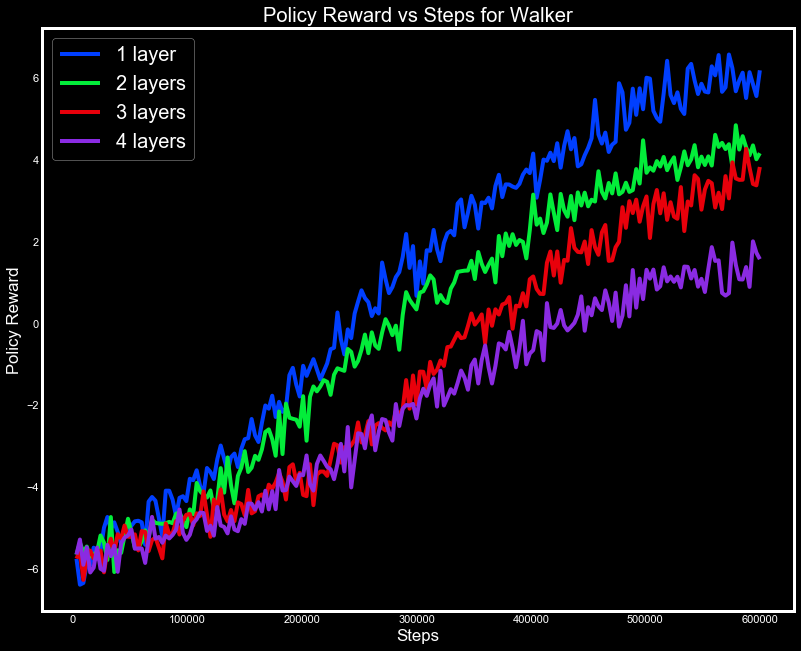

In [31]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T6', 'walker_T4', 'walker_T5', 'walker_T7'] # order is funky but that's how I roll
labels = ['1 layer', '2 layers', '3 layers', '4 layers']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_layers')

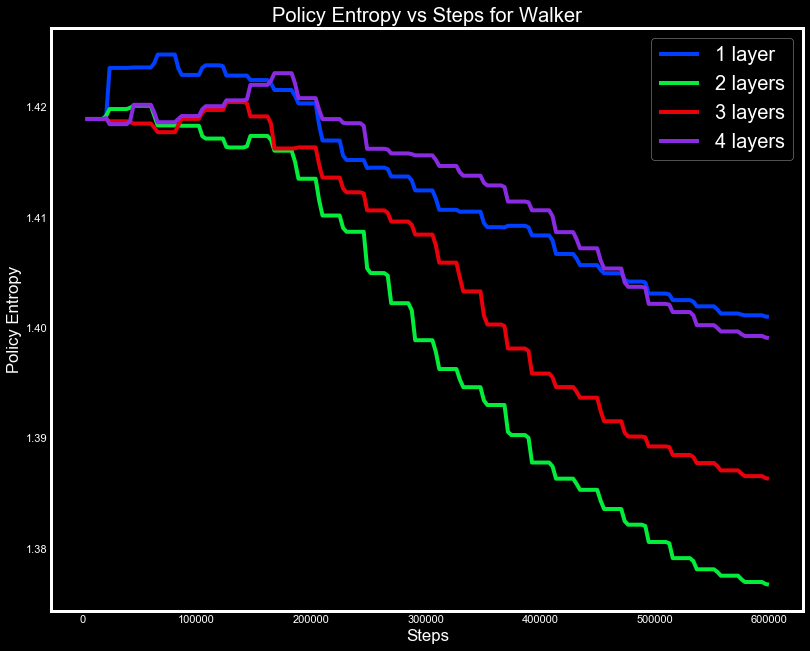

In [32]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T6', 'walker_T4', 'walker_T5', 'walker_T7'] # order is funky but that's how I roll
labels = ['1 layer', '2 layers', '3 layers', '4 layers']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_layers')

#### Learning Rates

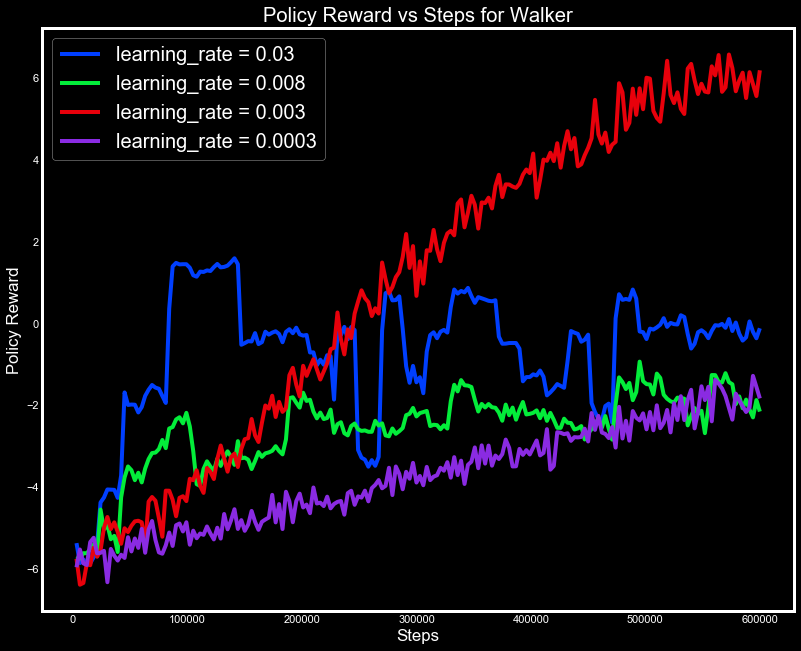

In [36]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T9', 'walker_T10', 'walker_T6', 'walker_T8'] # order is funky but that's how I roll
labels = ['learning_rate = 0.03', 'learning_rate = 0.008', 'learning_rate = 0.003', 'learning_rate = 0.0003']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_lr')

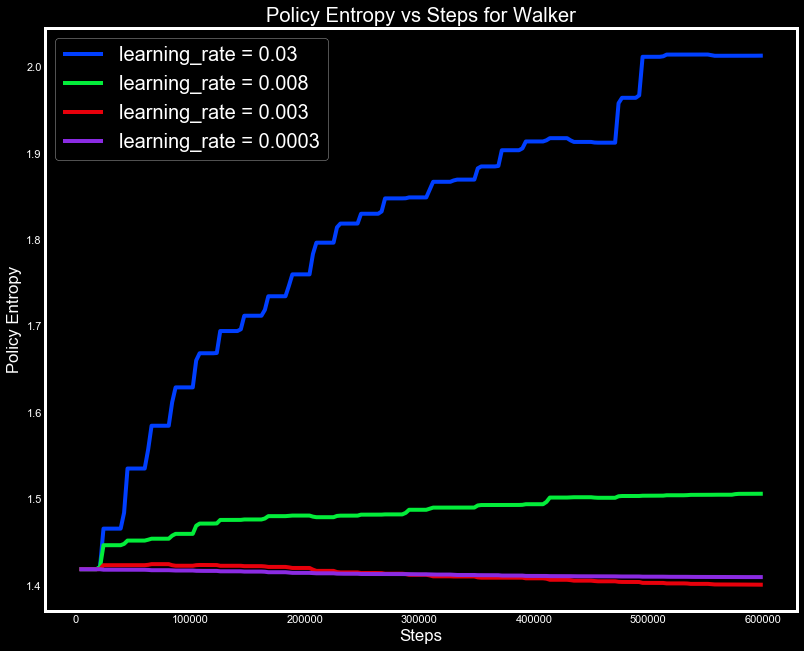

In [35]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T9', 'walker_T10', 'walker_T6', 'walker_T8'] # order is funky but that's how I roll
labels = ['learning_rate = 0.03', 'learning_rate = 0.008', 'learning_rate = 0.003', 'learning_rate = 0.0003']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_lr')

#### Using an RNN?

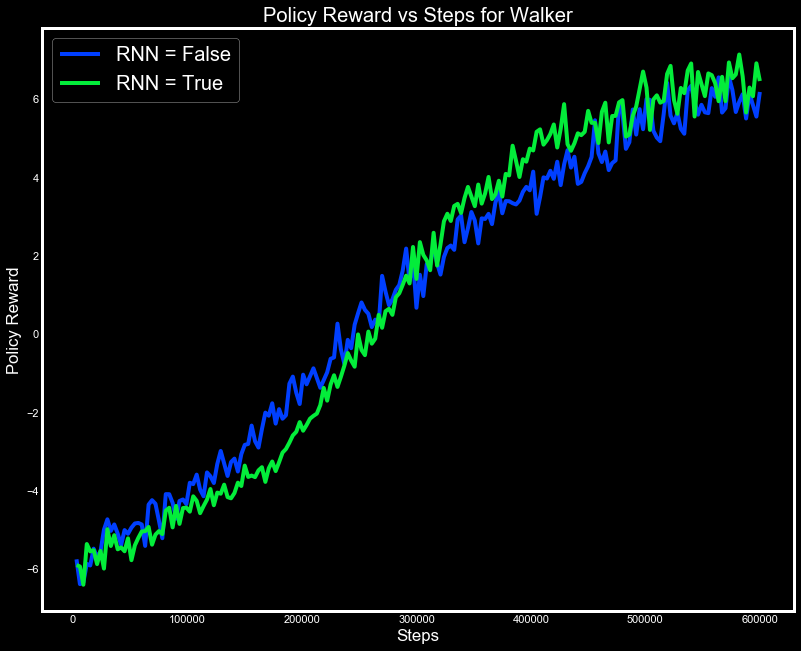

In [37]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T6', 'walker_T11'] # order is funky but that's how I roll
labels = ['RNN = False', 'RNN = True']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_NN')

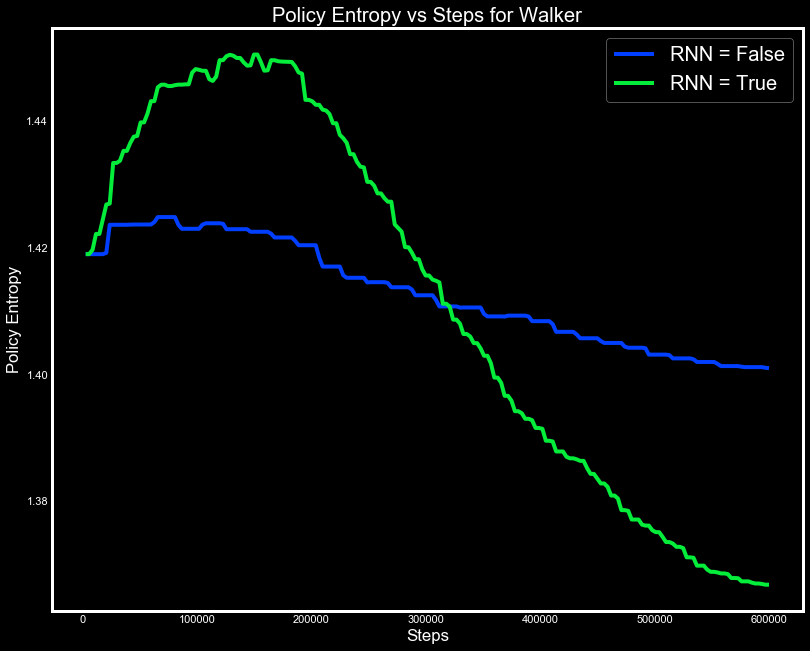

In [38]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T6', 'walker_T11'] # order is funky but that's how I roll
labels = ['RNN = False', 'RNN = True']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_NN')

#### Summary Frequencies

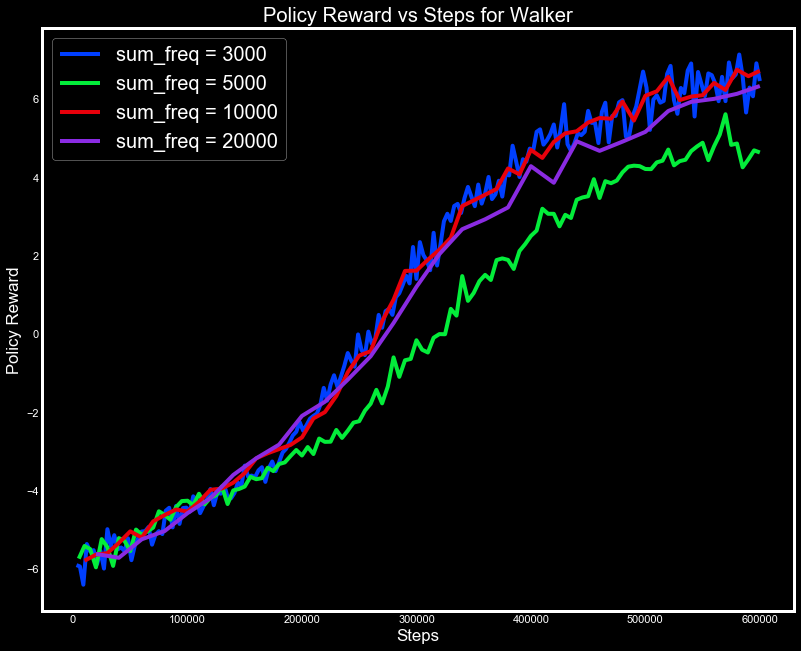

In [40]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T11', 'walker_T12', 'walker_T13', 'walker_T14']
labels = ['sum_freq = 3000', 'sum_freq = 5000', 'sum_freq = 10000', 'sum_freq = 20000']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_freq')

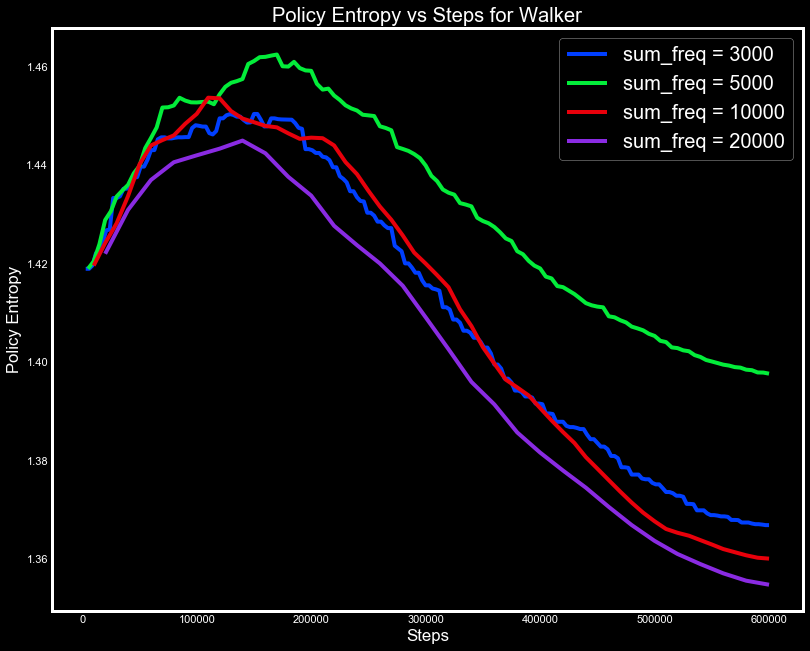

In [41]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T11', 'walker_T12', 'walker_T13', 'walker_T14']
labels = ['sum_freq = 3000', 'sum_freq = 5000', 'sum_freq = 10000', 'sum_freq = 20000']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_freq')

#### PPO vs SAC

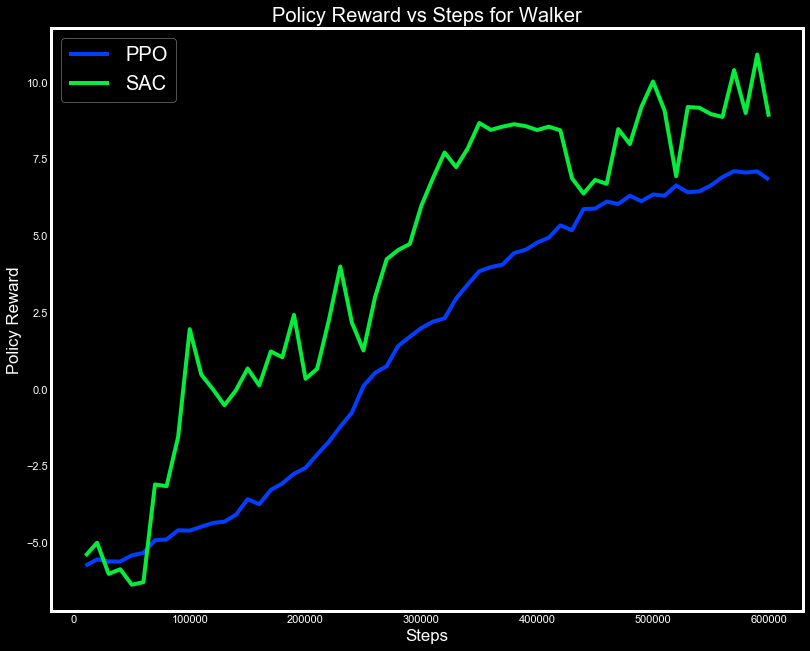

In [43]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T15', 'walker_SAC1']
labels = ['PPO', 'SAC']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_PPO_SAC')

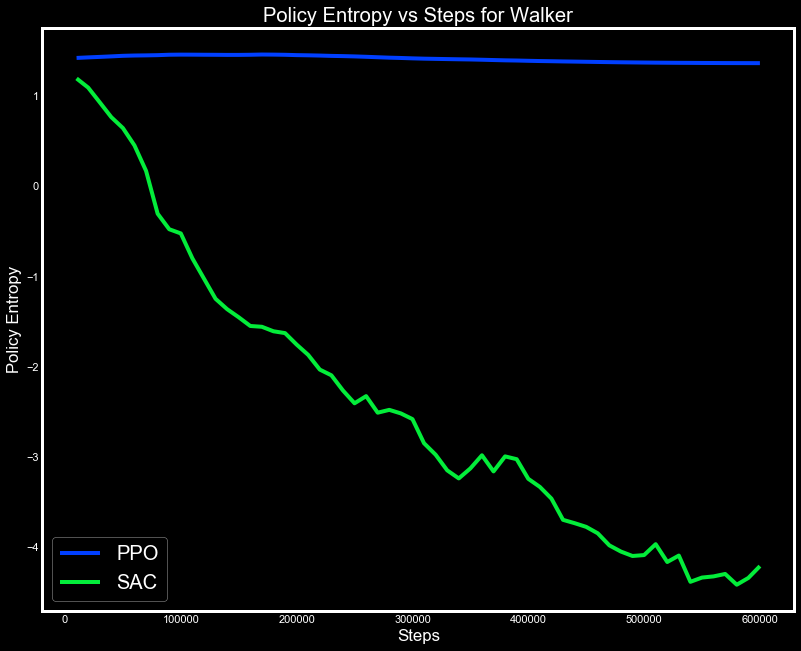

In [44]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T15', 'walker_SAC1']
labels = ['PPO', 'SAC']
plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_PPO_SAC')

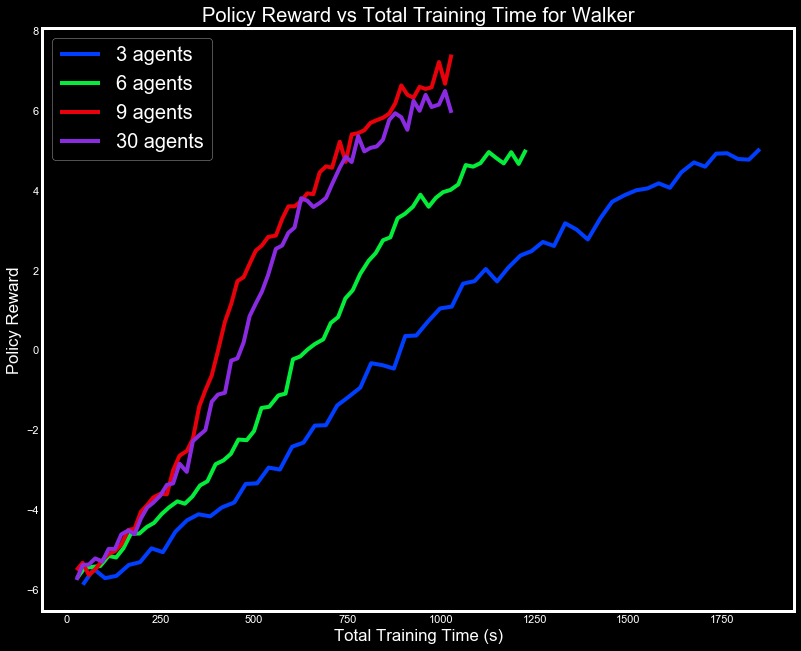

In [109]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_3_agents', 'walker_6_agents', 'walker_9_agents', 'walker_30_agents']
labels = ['3 agents', '6 agents', '9 agents', '30 agents']
plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/test', timing_data=True)

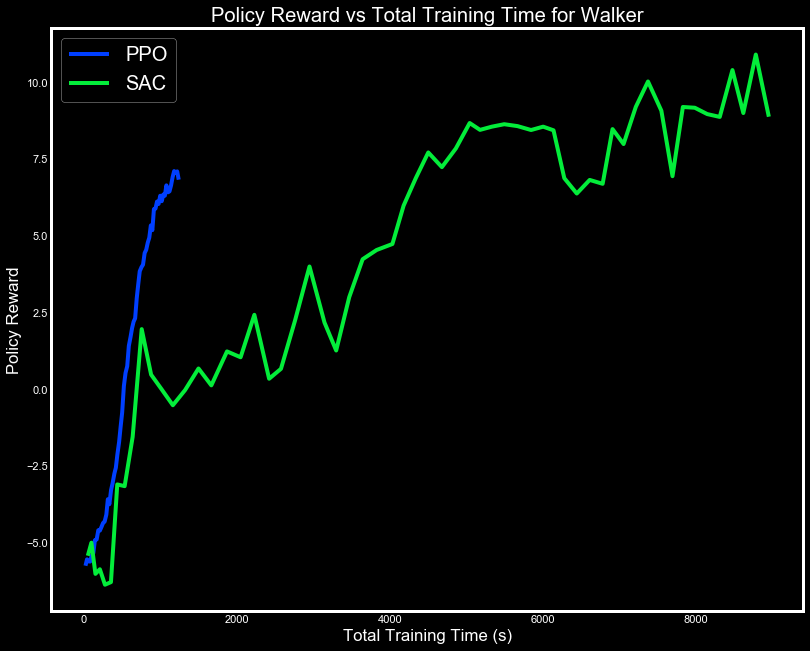

In [110]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T15', 'walker_SAC1']
labels = ['PPO', 'SAC']
plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_PPO_SAC', timing_data=True)

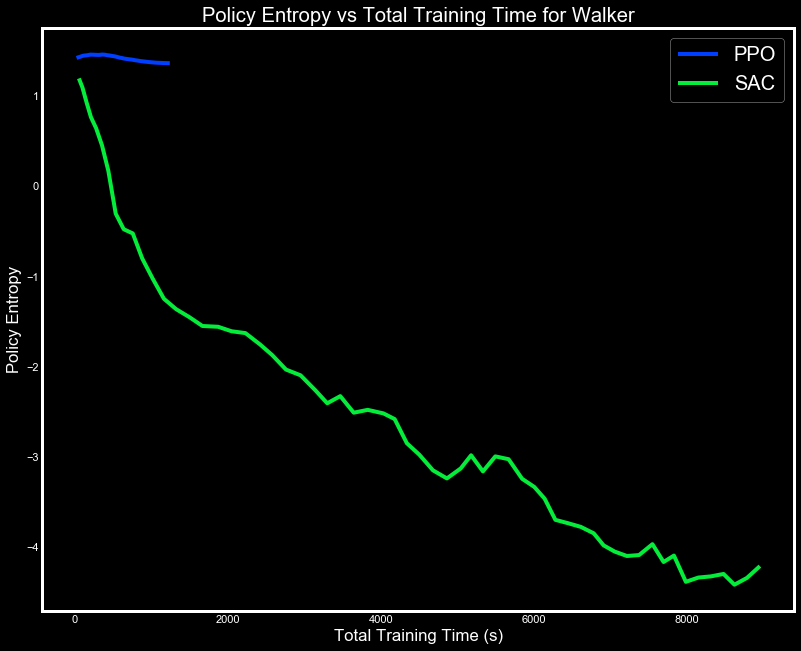

In [112]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T15', 'walker_SAC1']
labels = ['PPO', 'SAC']
plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_PPO_SAC', timing_data=True)

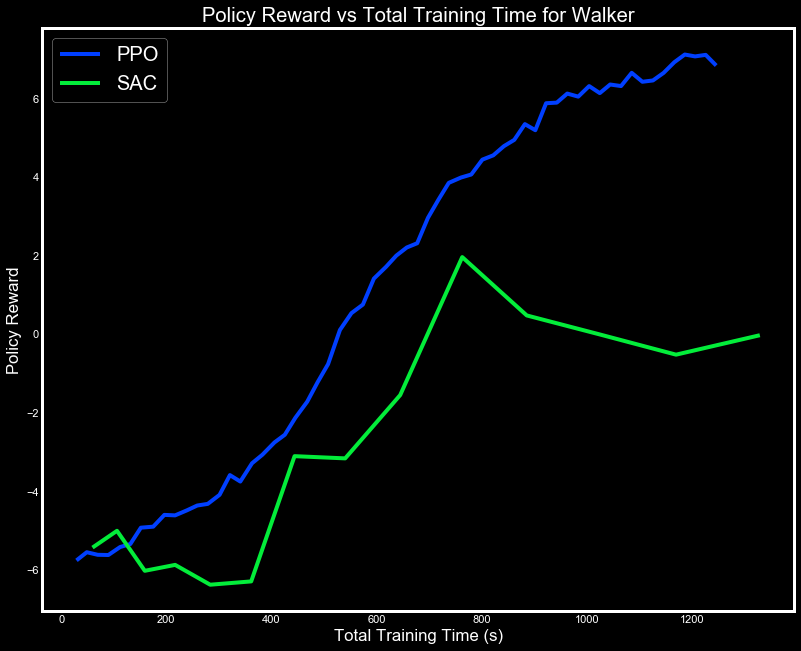

In [111]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T15', 'walker_SAC1_trunc']
labels = ['PPO', 'SAC']
plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_PPO_SAC_trunc', timing_data=True)

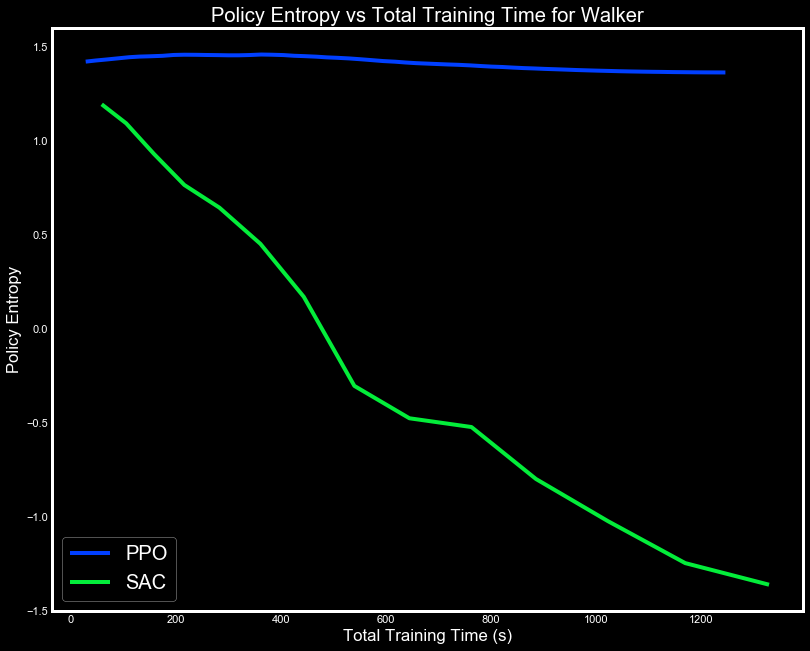

In [113]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T15', 'walker_SAC1_trunc']
labels = ['PPO', 'SAC']
plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_PPO_SAC_trunc', timing_data=True)

Puncher_Run2 rewards(torque=10):

* Destroying target: 1

* Hitting target: 0.2

* Looking at target: (1/60) / s

* NOT looking at target (1/60) / s 

Puncher3 rewards(torque=20):

* Destroying target: 1

* Hitting target: 0.2

* __Looking at target: (2/60) / s__

* NOT looking at target (1/60) / s 

YAML File:

Puncher:
  trainer: ppo
  
  batch_size: 64
  
  beta: 0.001
  
  buffer_size: 12000
  
  epsilon: 0.2
  
  hidden_units: 128
  
  lambd: 0.99
  
  learning_rate: 0.0003
  
  learning_rate_schedule: linear
  
  max_steps: 5.0e6
  
  memory_size: 128
  
  normalize: true
  
  num_epoch: 3
  
  num_layers: 2
  
  time_horizon: 1000
  
  sequence_length: 64
  
  summary_freq: 12000
  
  use_recurrent: false
  
  vis_encode_type: simple
  
  reward_signals:
  
    extrinsic:
    
      strength: 1.0
      
      gamma: 0.99


In [6]:
df1_x, df1_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
puncher_times = pd.read_csv('data/Puncher_2_Training_times.csv', header=None)

In [17]:
puncher_times.iloc[0].str.split('Time Elapsed: ')[0][1].split(' s ')[0]

'34.518'

In [27]:
puncher_times[0]

0        34.518
1        57.389
2        83.065
3       101.177
4       126.970
         ...   
411    9016.928
412    9037.358
413    9056.349
414    9078.513
415    9099.203
Name: 0, Length: 416, dtype: object

In [18]:
for i in range(puncher_times.shape[0]):
    puncher_times.iloc[i] = puncher_times.iloc[i].str.split('Time Elapsed: ')[0][1].split(' s ')[0]

In [ ]:
df1_x, df1_y = get_reward_data('data/Puncher_Run1_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df2_x, df2_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df3_x, df3_y = get_reward_data('data/Puncher_3_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df4_x, df4_y = get_reward_data('data/Puncher_4_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')

xlabel = 'Steps'
ylabel = 'Policy Reward'

fig, axs = plt.subplots(figsize=(12,10))
# axs.plot(df1_x, df1_y, label='initial short run', alpha=1.0)
axs.plot(df2_x, df2_y, label='longer run', alpha=0.7)
axs.plot(df3_x, df3_y, label='longer run - updated rewards', alpha=0.7)
# axs.plot(df4_x, df4_y, label='higher reward for looking', alpha=0.7)
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel(xlabel)
axs.set_ylabel(ylabel)
axs.set_title(f"{ylabel} vs {xlabel} for Puncher")
plt.savefig('reward_2runs_puncher.png')
plt.show()

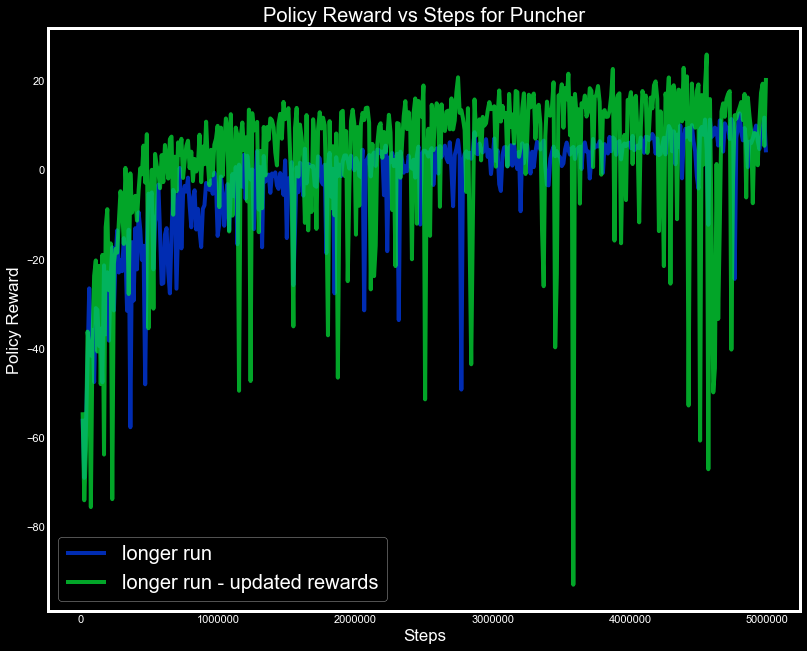

In [14]:
df1_x, df1_y = get_reward_data('data/Puncher_Run1_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df2_x, df2_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df3_x, df3_y = get_reward_data('data/Puncher_3_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')
df4_x, df4_y = get_reward_data('data/Puncher_4_Puncher.csv', 'Steps', 'Policy/Extrinsic Reward')

xlabel = 'Steps'
ylabel = 'Policy Reward'

fig, axs = plt.subplots(figsize=(12,10))
# axs.plot(df1_x, df1_y, label='initial short run', alpha=1.0)
axs.plot(df2_x, df2_y, label='longer run', alpha=0.7)
axs.plot(df3_x, df3_y, label='longer run - updated rewards', alpha=0.7)
# axs.plot(df4_x, df4_y, label='higher reward for looking', alpha=0.7)
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel(xlabel)
axs.set_ylabel(ylabel)
axs.set_title(f"{ylabel} vs {xlabel} for Puncher")
plt.savefig('reward_2runs_puncher.png')
plt.show()
# single_plot(df1_x, df1_y, 'Steps', 'Policy Reward', 'springgreen')

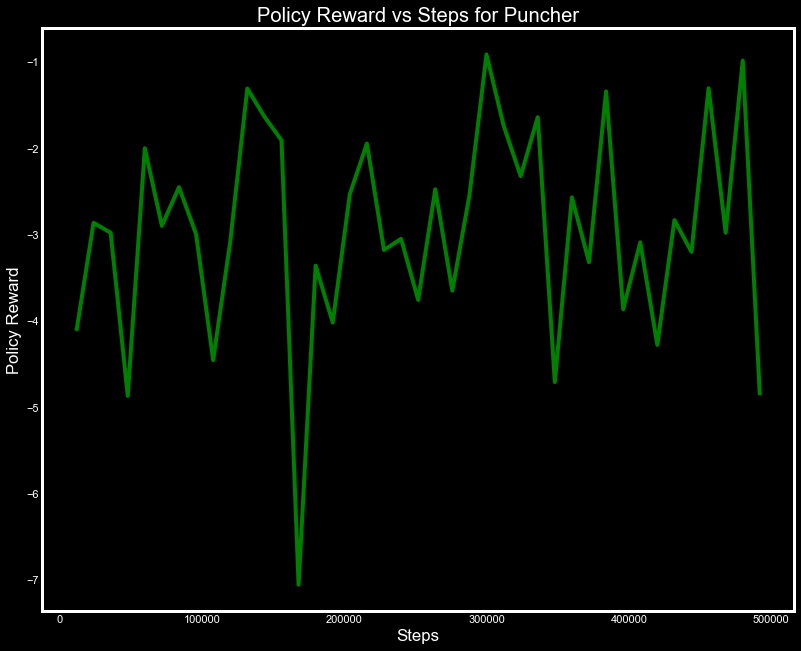

In [6]:
single_plot(df4_x, df4_y, xlabel, ylabel, "green")

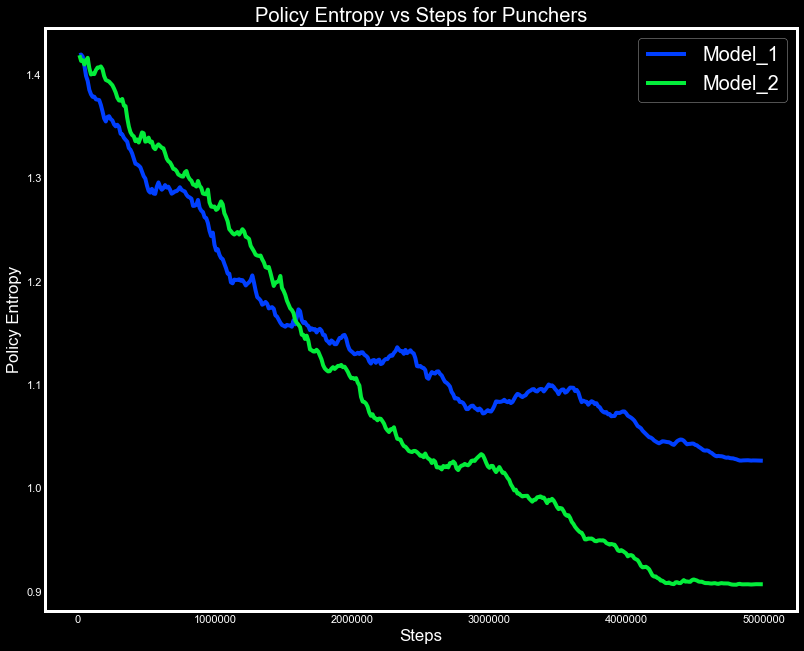

In [3]:
df1_x, df1_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Entropy')
df2_x, df2_y = get_reward_data('data/Puncher_3_Puncher.csv', 'Steps', 'Policy/Entropy')

# single_plot(df1_x, df1_y, 'Steps', 'Policy Reward', 'springgreen')
fig, axs = plt.subplots(figsize=(12,10))
axs.plot(df1_x, df1_y, label='Model_1')
axs.plot(df2_x, df2_y, label='Model_2')
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel('Steps')
axs.set_ylabel('Policy Entropy')
axs.set_title('Policy Entropy vs Steps for Punchers')
plt.savefig('entropy_vs_steps_23.png')
plt.show()

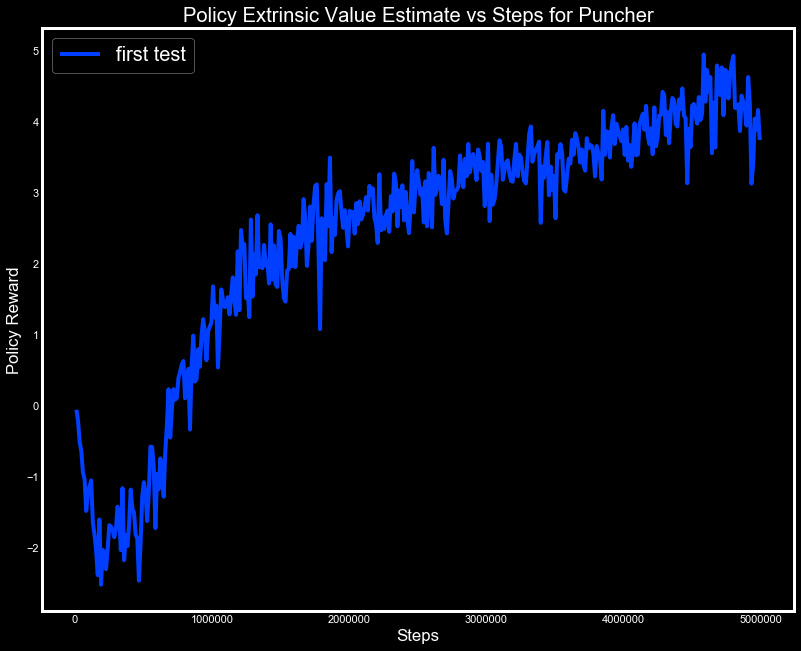

In [11]:
df1_x, df1_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Policy/Extrinsic Value Estimate')
fig, axs = plt.subplots(figsize=(12,10))
axs.plot(df1_x, df1_y, label='first test')
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel('Steps')
axs.set_ylabel('Policy Reward')
axs.set_title('Policy Extrinsic Value Estimate vs Steps for Puncher')
#plt.savefig('reward_2runs_trunc.png')
plt.show()

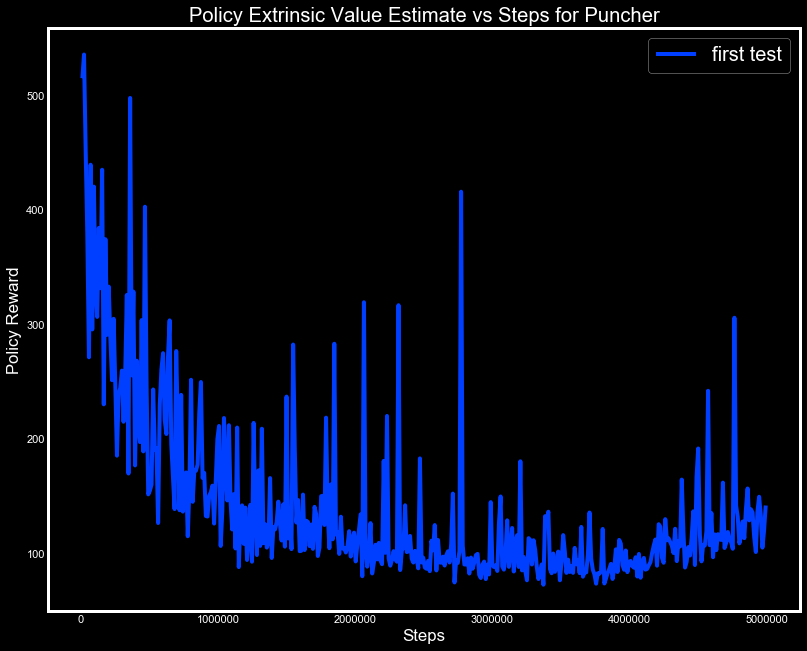

In [16]:
df1_x, df1_y = get_reward_data('data/Puncher_Run2_Puncher.csv', 'Steps', 'Environment/Episode Length')
fig, axs = plt.subplots(figsize=(12,10))
axs.plot(df1_x, df1_y, label='first test')
axs.grid(False)
axs.legend(fontsize=20)
axs.set_xlabel('Steps')
axs.set_ylabel('Policy Reward')
axs.set_title('Policy Extrinsic Value Estimate vs Steps for Puncher')
#plt.savefig('reward_2runs_trunc.png')
plt.show()